#Task 1: Linear Filter
You are required to implement the Smoothing Operation with Average Filter (Box & Weighted Average filters). Both filters can contain user defined parameters to obtain different levels of blurring effects, which is the size of the filter in this case. Complete the following two functions

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import skimage.color
import skimage.filters
from scipy import signal
import random
import colorsys
from google.colab.patches import cv2_imshow

In [5]:
def apply_convolution(image, kernel):
    h, w = image.shape[:2]
    kh, kw = kernel.shape[:2]
    pad_h, pad_w = kh // 2, kw // 2
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w), (0, 0)), mode='constant')

    result = np.zeros_like(image)
    for i in range(h):
        for j in range(w):
            for k in range(image.shape[2]):
                region = padded_image[i:i+kh, j:j+kw, k]
                result[i, j, k] = np.sum(region * kernel)

    return result

In [7]:
def boxFilter(image, size):
  #implement this function
  kernel = np.ones((size, size)) / (size * size)
  return apply_convolution(image, kernel)

def weightedFilter(image, size):
  #implement this function
    x, y = np.mgrid[-size//2:size//2+1, -size//2:size//2+1]
    sigma = 1.0
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2)) #Nornaml distribution
    kernel /= kernel.sum()

    blur_image = apply_convolution(image, kernel)

    return blur_image.astype(np.uint8)



# Task 1: Output and Analysis
For this task, use an appropriate color image from Chapter 06.zip. Use your previously implemented functions to show the outputs of the two averaging filters on the sample image in both RGB and HSV color spaces. Provide your analysis on the following topics:
<ol>
<li> Explain how the parameters affect the increase or decrease of the blurring effect. </li>

<li> Do we require intensity scaling after applying averaging filters? </li>

<li> Is there any differences observed between the results of RGB and HSV color spaces? </li>
</ol>

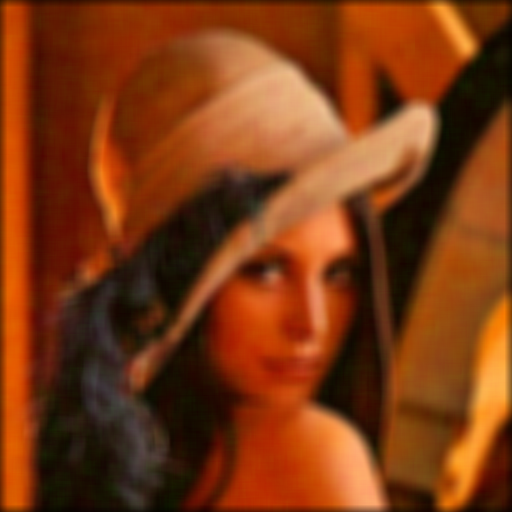

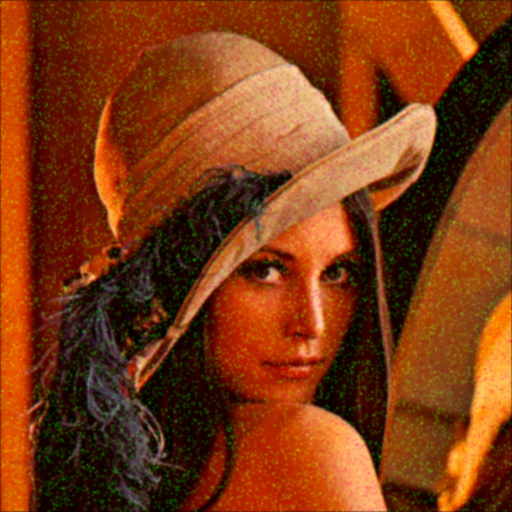

In [12]:
# Generate outputs for Task 1 here
image_path = "noise.tif"
image = cv2.imread(image_path, cv2.IMREAD_COLOR )
image = cv2.resize(image, (512, 512))
box_filtered= boxFilter(image, 15)
cv2_imshow(box_filtered)
weightedAvg_filtered=weightedFilter(image, 5)
cv2_imshow(weightedAvg_filtered)


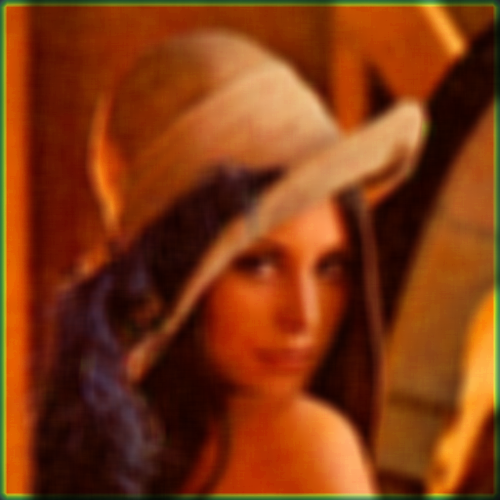

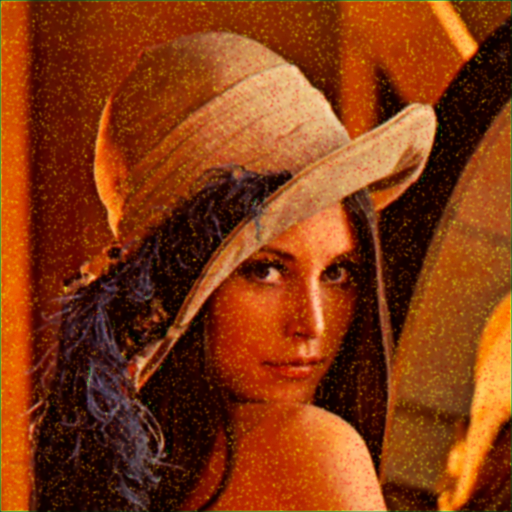

In [16]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
h_channel, s_channel, v_channel = cv2.split(image_hsv)
box_filtered2= boxFilter(image_hsv, 15)
box_filtered2 = cv2.resize(box_filtered2, (500, 500))
image2= cv2.cvtColor(box_filtered2, cv2.COLOR_HSV2RGB)
cv2_imshow(image2)
#########
weightedAvg_filtered2=weightedFilter(image_hsv, 5)
weightedAvg_filtered2 = cv2.resize(weightedAvg_filtered2, (512, 512))
image3= cv2.cvtColor(weightedAvg_filtered2, cv2.COLOR_HSV2RGB)
cv2_imshow(image3)
image3 = cv2.resize(image3, (512, 512))

##Analysis:
[Write your analysis here]

# Task 2
For this task, you are required to write a function designed to artificially add Salt & Pepper noise to a given image. The function should contain a parameter called noise_level (value between 0 and 1) that determines the percentage of pixels that will be affected by Salt & Pepper noise.

Also, write three separate functions to implement the Median Filter, Min Filter, and Max Filter.

In [62]:
def salt_and_pepper(image, noise_level):
    noisy_image = np.copy(image)
    total_pixels = image.shape[0] * image.shape[1]
    num_salt = int(np.ceil(noise_level * total_pixels * 0.5))
    num_pepper = int(np.ceil(noise_level * total_pixels * 0.5))

    # Add Salt noise
    coords = [np.random.randint(0, i, num_salt) for i in image.shape[:2]]
    noisy_image[coords[0], coords[1], :] = 255

    # Add Pepper noise
    coords = [np.random.randint(0, i, num_pepper) for i in image.shape[:2]]
    noisy_image[coords[0], coords[1], :] = 0

    return noisy_image

In [71]:
def medianFilter(image, kernel_size):
    # Ensure kernel size is odd
    if kernel_size % 2 == 0:
        kernel_size += 1
    pad_size = kernel_size // 2
    padded_image = np.pad(image, pad_size, mode='edge')  # Pad the image
    filtered_image = np.zeros_like(image)
    for i in range(filtered_image.shape[0]):
        for j in range(filtered_image.shape[1]):
            region = padded_image[i:i + kernel_size, j:j + kernel_size]
            filtered_image[i, j] = np.median(region)

    return filtered_image

In [83]:
def minFilter(image, kernel_size):
    if kernel_size % 2 == 0:
        kernel_size += 1

    pad_size = kernel_size // 2
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size)), mode='edge')  # Pad the image
    filtered_image = np.zeros_like(image)

    # Perform the min filter operation
    for i in range(filtered_image.shape[0]):
        for j in range(filtered_image.shape[1]):
            region = padded_image[i:i + kernel_size, j:j + kernel_size]
            filtered_image[i, j] = np.min(region)

    return filtered_image

In [92]:
def maxFilter(noisy_image, kernel_size):
    if kernel_size % 2 == 0:
        kernel_size += 1

    pad_size = kernel_size // 2
    padded_image = np.pad(noisy_image, ((pad_size, pad_size), (pad_size, pad_size)), mode='edge')  # Pad the image
    filtered_image = np.zeros_like(noisy_image)

    # Perform the max filter operation
    for i in range(filtered_image.shape[0]):
        for j in range(filtered_image.shape[1]):
            region = padded_image[i:i + kernel_size, j:j + kernel_size]
            filtered_image[i, j] = np.max(region)

    return filtered_image

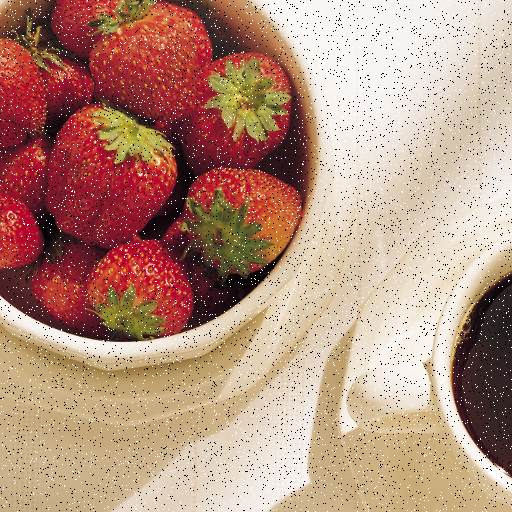

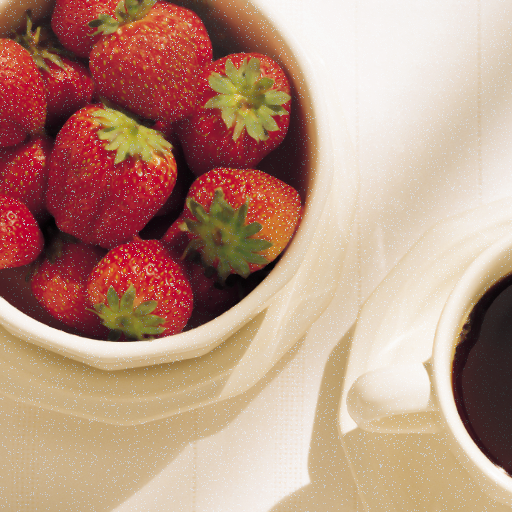

In [70]:
img = cv2.imread("strawberry.tif", cv2.IMREAD_COLOR)
img = cv2.resize(img, (512, 512))
noisy_image = salt_and_pepper(img, 0.05)
cv2_imshow(noisy_image)

##########
hsv_img = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2HSV)
h_channel, s_channel, v_channel = cv2.split(hsv_img)
# Apply the median filter on the V channel
filtered_v_channel = medianFilter(v_channel, 5)
filtered_hsv = cv2.merge([h_channel, s_channel, filtered_v_channel])
filtered_image = cv2.cvtColor(filtered_hsv, cv2.COLOR_HSV2BGR)
cv2_imshow(filtered_image)

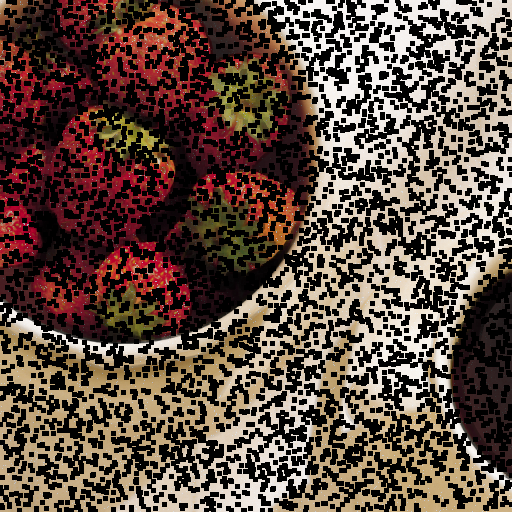

In [84]:
hsv_img = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2HSV)
h_channel, s_channel, v_channel = cv2.split(hsv_img)
filtered_v_channel = minFilter(v_channel, 5)
filtered_hsv = cv2.merge([h_channel, s_channel, filtered_v_channel])
filtered_image = cv2.cvtColor(filtered_hsv, cv2.COLOR_HSV2BGR)
cv2_imshow(filtered_image)

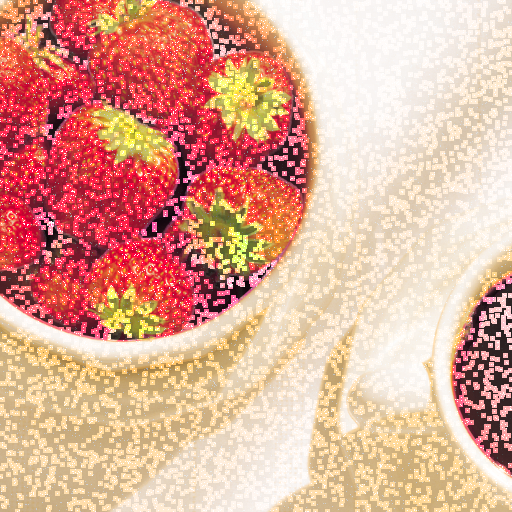

In [93]:
hsv_img = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2HSV)
h_channel, s_channel, v_channel = cv2.split(hsv_img)
filtered_v_channel = maxFilter(v_channel, 5)
filtered_hsv = cv2.merge([h_channel, s_channel, filtered_v_channel])
filtered_image = cv2.cvtColor(filtered_hsv, cv2.COLOR_HSV2BGR)
cv2_imshow(filtered_image)

# Task 2: Output and Analysis
Use your previously implemented functions to show the addition of salt & pepper noise to a sample image, as well as how your implemented filters can remove the noise.

Show the results for both RGB and HSV color spaces.

Provide your analysis on the following topic:
<ol>
<li> What happens when the noise level increases for a particular filter size? </li>

<li> How does filter size affect the noise reduction? </li>

<li> Is there any differences observed between the results of RGB and HSV color spaces? </li>
</ol>

In [ ]:
#Generate output for Task 2 here


## Analysis:
[Write your analysis here]

# Task 3

For this task, you are required to design a Laplacian filter that will be used to compute edge responses. The function will return the edge response as an image, which will be called inside the sharpen function to generate a sharpened version of an image. The sharpen function contains a user defined parameter that can be used to control the level of sharpening.


In [94]:
def laplacian(image):
    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    laplacian_kernel = np.array([[0, 1, 0],
                                  [1, -4, 1],
                                  [0, 1, 0]])

    edge_response = cv2.filter2D(gray_image, -1, laplacian_kernel)

    return edge_response

def sharpen(image, sharpen_level):

    if sharpen_level < 0:
        raise ValueError("Sharpen level must be non-negative.")

    edge_response = laplacian(image)
    edge_response = cv2.normalize(edge_response, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    sharp_image = cv2.addWeighted(image, 1 + sharpen_level, edge_response, sharpen_level, 0)

    return sharp_image



# Task 3: Output and Analysis
Use your previously implemented laplacian function to show the edge response of a sample image. use an appropriate color image from Chapter 06.zip for this task. Next, show the sharpened image after using the sharpen function.

Show the results for both RGB and HSV color spaces.

Provide your analysis on the following topic:
<ol>
<li> Why do we require intensity scaling after computing the sharpening? </li>
<li> How does the value of sharpen_level affect the sharpening? </li>
<li> Is there any differences observed between the results of RGB and HSV color spaces? </li>

</ol>

In [95]:
#Generate output for Task 3 here

image = cv2.imread('strawberry.tif')
sharpened_image = sharpen(image, sharpen_level=1.5)
cv2.imshow('Original Image', image)
cv2.imshow('Sharpened Image', sharpened_image)


error: OpenCV(4.10.0) /io/opencv/modules/core/src/arithm.cpp:658: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'


## Analysis:
[Write your analysis here]

# Task 4

For this task, you are required to design a function that takes two parameters: an image and a value $k$. The function should perform Unsharp masking ($k=1$) and High-boost filtering ($k>1$) and return a filtered image.

In [ ]:
def high_boost_filter(image, k):
  #implement this function

  return filtered_image

# Task 4: Output and Analysis
Use your previously implemented high_boost_filter function to show the output of Unsharp Masking and High-boost filtering on an RGB image. Next, show both outputs for the HSI color space.

Provide your analysis on the following topic:
<ol>
<li> Is there any difference in applying unsharp masking or high-boost filtering for RGB and HSI color space? </li>
<li> What happens if $k<1$? </li>
</ol>